In [1]:
import Experiments.Models as M
import Experiments.Experiment as E
import ImagePreprocessing.ImageProcessing as IP
import Experiments.Data as D
import seaborn as sns
import cv2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix 
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
csvPaths = ['Images/Labels/Clean.csv', 
            'Images/Labels/NewBalanced.csv', 
            'Images/Labels/YouTube.csv']
imgPath = 'Images/Preproc/'

csvPaths = ['/home/serhii/AccountEyeTest/Images/Augmented/NewBalanced_Blur+Augmentation.csv',]
imgPath = '/opt/AccountEye/Images/Preproc/'

train_part = 0.7
test_part = 0.2
batch_size = 256
num_classes = 20
epochs = 10
img_rows, img_cols, channels = 48, 32, 3
input_shape = (img_rows, img_cols, channels)

In [3]:
(x_train, y_train_o), (x_test, y_test_o), (x_valid, y_valid_o) = D.load_data(csvPaths, imgPath, img_rows, img_cols, channels=channels,
                                                              train_part=train_part, test_part=test_part, labelRow='20_Classes')


In [4]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_train_o.shape)
print(y_test_o.shape)
print(y_valid_o.shape)

(4909, 48, 32, 3)
(1403, 48, 32, 3)
(702, 48, 32, 3)
(4909,)
(1403,)
(702,)


In [5]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)

In [6]:
y_train = K.utils.to_categorical(y_train_o, num_classes)
y_test = K.utils.to_categorical(y_test_o, num_classes)
y_valid = K.utils.to_categorical(y_valid_o, num_classes)

# SVM

In [ ]:
modelSVM = SVC()

In [ ]:
modelSVM.fit(x_train, y_train_o)

In [ ]:
accTrain = modelSVM.score(x_train, y_train_o) 
accTest = modelSVM.score(x_test, y_test_o) 
accValid = modelSVM.score(x_valid, y_valid_o) 

In [ ]:
print(accTrain)
print(accTest)
print(accValid)

In [ ]:
predictTrainSVM = modelSVM.predict(x_train)
predictTestSVM = modelSVM.predict(x_test)
predictValidSVM = modelSVM.predict(x_valid)

In [ ]:
# creating a confusion matrix 
sns.heatmap(confusion_matrix(y_train_o, predictTrainSVM))

In [ ]:
sns.heatmap(confusion_matrix(y_test_o, predictTestSVM))

In [ ]:
sns.heatmap(confusion_matrix(y_valid_o, predictValidSVM))

# K-Neighbors

In [7]:
modelKNN = KNN(n_neighbors = 7, n_jobs=7)

In [8]:
modelKNN.fit(x_train, y_train_o) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=7, n_neighbors=7, p=2,
           weights='uniform')

In [9]:
accTrain = modelKNN.score(x_train, y_train_o) 
accTest = modelKNN.score(x_test, y_test_o) 
accValid = modelKNN.score(x_valid, y_valid_o) 

In [10]:
print(accTrain)
print(accTest)
print(accValid)

0.8669790181299654
0.7961511047754811
0.7649572649572649


In [11]:
# creating a confusion matrix 
predictTrainKNN = modelKNN.predict(x_train)
predictTestKNN = modelKNN.predict(x_test)
predictValidKNN = modelKNN.predict(x_valid)

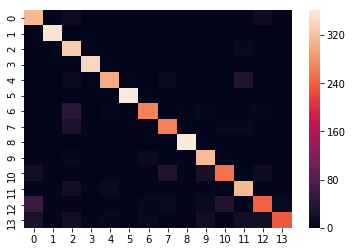

In [12]:
sns.heatmap(confusion_matrix(y_train_o, predictTrainKNN))

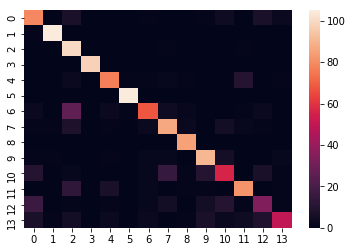

In [13]:
sns.heatmap(confusion_matrix(y_test_o, predictTestKNN))

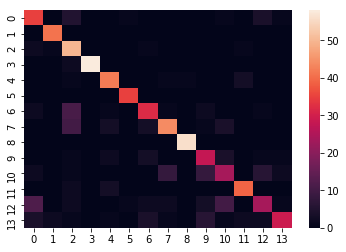

In [14]:
sns.heatmap(confusion_matrix(y_valid_o, predictValidKNN))